In [236]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## importing the necessary libraries

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## let's load the datasets

In [238]:
train = pd.read_csv('../input/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('../input/titanic/test.csv', index_col='PassengerId')

## let's inspect the datasets and get some info

In [239]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [241]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [242]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [243]:
train.shape

(891, 11)

* ## let's check the missing values and figure out how to fill them

In [244]:
print(train.isna().sum().sort_values(ascending=False))

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64


In [245]:
print(test.isnull().sum().sort_values(ascending=False))

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64


## So we have missing values in cabin, age and embarked in training dataset,
## cabin, age and fare in test dataset.Let's check them out one by one and see how to deal with them

### let's check for the missing cabin values first

In [246]:
print(train.Cabin.head(10))

PassengerId
1      NaN
2      C85
3      NaN
4     C123
5      NaN
6      NaN
7      E46
8      NaN
9      NaN
10     NaN
Name: Cabin, dtype: object


## Since out of 891, 687 values are mising, there is no sense of replacing them with median or mode of the data.let's just fill the missing values with letter 'Z' and keep the first letters of given cabin values and discard the rest.

In [247]:
train.Cabin= train.Cabin.apply(lambda x: 'Z' if pd.isnull(x) else x[0])
print('train: ')
print(train.Cabin.unique())

# do the same for test data

test.Cabin = test.Cabin.apply(lambda x: 'Z' if pd.isnull(x) else x[0])
print('test: ')
print(test.Cabin.unique())


train: 
['Z' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
test: 
['Z' 'B' 'E' 'A' 'C' 'D' 'F' 'G']


### Now let's check for age column

In [248]:
train.Age.head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


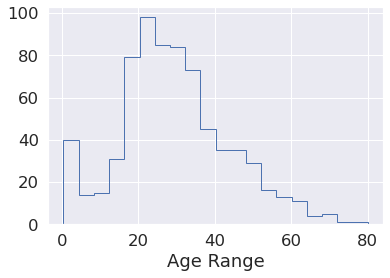

In [249]:
plt.hist(x=train['Age'], bins=20, histtype='step')
plt.xlabel('Age Range')
plt.show()

In [250]:
train.Age.median()

28.0

In [251]:
train.Age.mode()

0    24.0
dtype: float64

In [252]:
train.Age.mean()

29.69911764705882

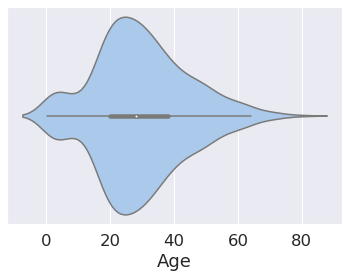

In [253]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.violinplot(x='Age', data=train)

### let's fill the missing age values with the mean age

In [254]:
train.Age.fillna(value = train.Age.mean(), inplace=True)
# do the same for test data
test.Age.fillna(value= test.Age.mean(), inplace=True)

### Now let's check for missing values in Embarked column

In [255]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

### let's fill with the most common value

In [256]:
train.Embarked.mode()

0    S
dtype: object

In [257]:
train.Embarked.fillna(value = 'S', inplace=True)


### there is one missing value of Fare in test data. Let's fill it with the mean

In [258]:
test.Fare.fillna(value=test.Fare.mean(), inplace=True)

### now let's recheck the missing values

In [259]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [260]:
test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Let's see the relation between survival and other columns one by one

In [261]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 1. Pclass and survival

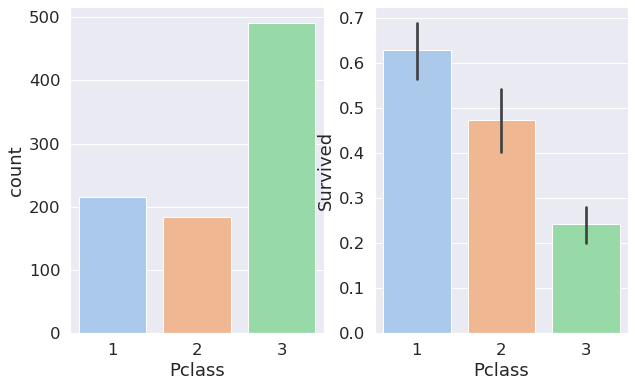

In [262]:
plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
sns.countplot(x='Pclass', data=train)
plt.subplot(1,2,2)
sns.barplot(data=train, x='Pclass', y='Survived')
plt.show()

### It can be seen that survival rate of first class passengers was greater than the others

### 2. Sex and survival

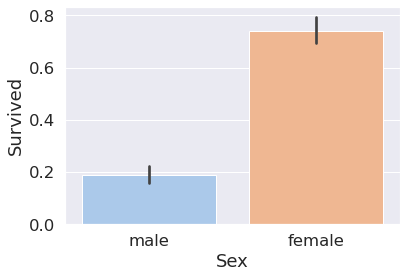

In [263]:

sns.barplot(data=train, x='Sex', y='Survived')
plt.show()

### OMG! look at the difference.

### let's check the survival combining gender and pclass together

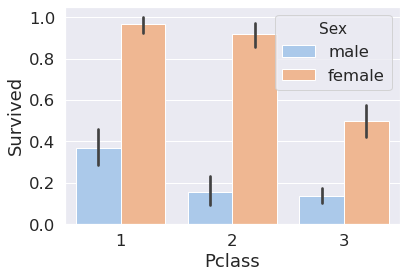

In [264]:
sns.barplot(data=train, x='Pclass', y='Survived', hue='Sex')
plt.show()

### so female were given priority over males in all the classes

### 3. Age and survival

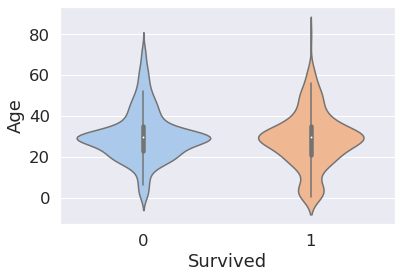

In [265]:
sns.violinplot(y=train.Age, x=train.Survived)

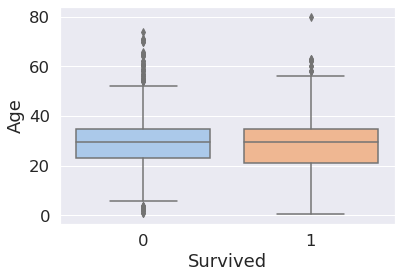

In [266]:
sns.boxplot(x='Survived', y='Age', data=train)

In [267]:
print(train[['Age', 'Survived']].groupby(['Survived'], as_index=False).mean())

   Survived        Age
0         0  30.415100
1         1  28.549778


### so, age doesn't seem to be a contributing factor for survival.

### 4. Sipsp and survival
#### lets check if number of siblings had any effect on survival

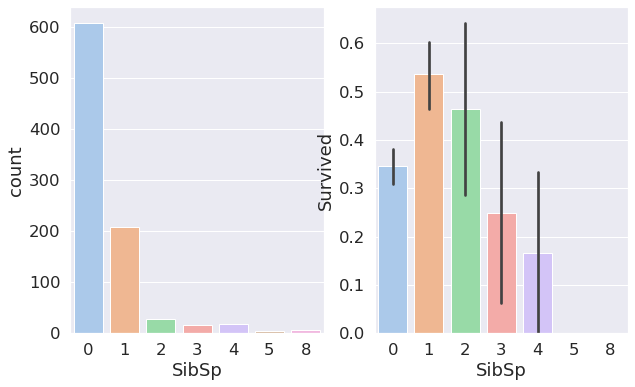

In [268]:
plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
sns.countplot(x='SibSp', data=train)
plt.subplot(1,2,2)
sns.barplot(data=train, x='SibSp', y='Survived')
plt.show()

In [269]:
#let's check the survival rate
print(train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


#### people with 0, 1 or 2 siblings had higher chances of survival. 

### 5. Parch and survival

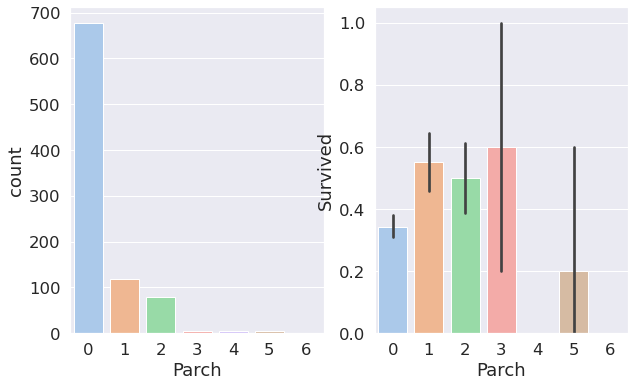

In [270]:
plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
sns.countplot(x='Parch', data=train)
plt.subplot(1,2,2)
sns.barplot(data=train, x='Parch', y='Survived')
plt.show()

In [271]:
print(train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


#### Again, people with 0,1,2, or 3 parenst/children had higher chances of survival

### 6. cabin and survival

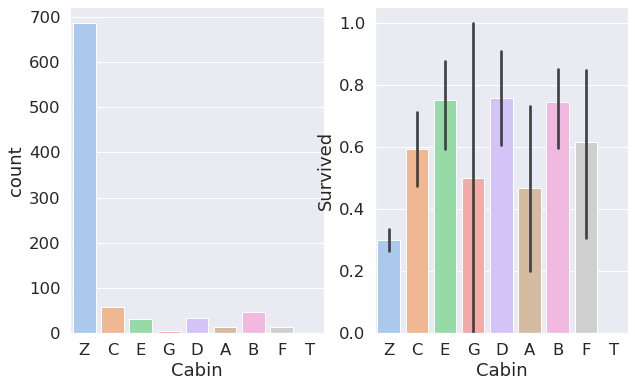

In [272]:
plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
sns.countplot(x='Cabin', data=train)
plt.subplot(1,2,2)
sns.barplot(data=train, x='Cabin', y='Survived')
plt.show()

In [273]:
train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean()

,Cabin,Survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000
7,T,0.000000
8,Z,0.299854


#### it looks like the passengers from cabin B,D and E had higher rates of survival. What could be the reason! Were these cabins nearer to the emergency exits???

### 7. Embarked and survival

In [274]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

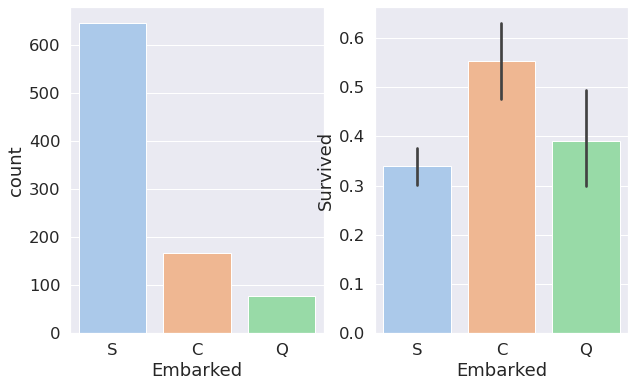

In [275]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=train, x='Embarked')
plt.subplot(1,2,2)
sns.barplot(data=train, x='Embarked', y='Survived')
plt.show()

#### So the passengers who boarded from Cheryl had higher chances of survival. Why so?? Did these poeple belong to first class? We will check it later.

### Now the tricky ones are left- name, ticket and fare. Let's see them one by one

### 8. Name and survival

In [276]:
train.Name.head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

#### Let's separate the designations and see if there is a relation between particular designations with chances of survival

In [277]:
train['Title'] = train['Name'].apply(lambda x: x.split('.')[0].split(' ')[-1])
train['Title'].value_counts()

# do he same for test data
test['Title'] = test['Name'].apply(lambda x: x.split('.')[0].split(' ')[-1])


#### let's change the 2's and 1's into a common value of 'others'

In [278]:

train["Title"] = train["Title"].replace(
    ['Lady','Countess','Capt', 'Mme', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms'], 
    'Rare'
)
train["Title"] = train["Title"].replace(
    'Miss', 
    'Mrs'
)
train['Title'].value_counts()

# lets do the same fortest data

test["Title"] = test["Title"].replace(
    ['Lady','Countess','Capt', 'Mme', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms'], 
    'Rare'
)
test["Title"] = test["Title"].replace(
    'Miss', 
    'Mrs'
)

In [279]:
train = train.drop('Name', axis = 1)

In [280]:
#train['designation']=train['designation'].replace(['Planke','Impe','Col.','Mlle.','Gordon','Major.' ,'Carlo','Cruyssen','Mme.','Walle','Capt.','Ms.','Steen','Billiard','Velde','Shawah','Messemaeker','the','der','Mulder','Don','Pelsmaeker','Jonkheer',
#'Melkebeke'], ['others','others','others','others','others','others','others','others','others','others','others','others','others','others','others','others','others','others','others','others','others','others','others','others' ],inplace=False)

In [281]:
#train= train.replace({"designation": {'Planke':'others','Impe':'others','Col.':'others','Mlle.':'others','Gordon':'others','Major.':'others','Carlo':'others','Cruyssen':'others','Mme.':'others','Walle':'others','Capt.':'others','Ms.':'others','Steen':'others','Billiard':'others','Velde':'others','Shawah':'others','Messemaeker':'others','the':'others','der':'others','Mulder':'others','Don':'others','Pelsmaeker':'others','Jonkheer':'others',
#'Melkebeke' : 'others'}})
#train['designation'].value_counts()



In [282]:
train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Mr,0.156673
2,Mrs,0.736156
3,Rare,0.444444


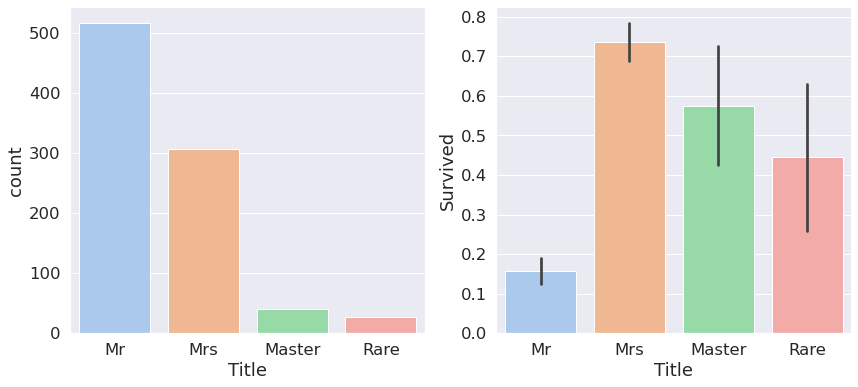

In [283]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(data=train, x='Title')
plt.subplot(1,2,2)
sns.barplot(data=train, x='Title', y='Survived')
plt.show()

### from the names and designations, its clear that it was Mrs and master who were preferred to be saved. 

### 9. Ticket and survival

In [284]:
train.Ticket.head(10)

PassengerId
1            A/5 21171
2             PC 17599
3     STON/O2. 3101282
4               113803
5               373450
6               330877
7                17463
8               349909
9               347742
10              237736
Name: Ticket, dtype: object

### let's get the first letters of the ticket. those will differentiate between different type of tickets.

In [285]:
train['Ticket'] = train['Ticket'].apply(lambda x: 'Z' if x.isdigit() else x.replace('.',' ').replace('/','').strip().split(' ')[0])
train['Ticket'].head()

# do the same for test data
test['Ticket'] = test['Ticket'].apply(lambda x: 'Z' if x.isdigit() else x.replace('.',' ').replace('/','').strip().split(' ')[0])

In [286]:
train.Ticket.unique()

array(['A5', 'PC', 'STONO2', 'Z', 'PP', 'C', 'A', 'SCParis', 'S', 'A4',
       'CA', 'SOC', 'W', 'SOTONOQ', 'STONO', 'SOTONO', 'SCPARIS', 'Fa',
       'LINE', 'F', 'WC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS',
       'WEP', 'SOTONO2'], dtype=object)

In [287]:
train.Ticket.value_counts()

Z          661
PC          60
C           33
A5          17
S           14
CA          14
STONO       12
W           10
SOTONO       8
A4           7
SOTONOQ      7
F            6
STONO2       6
SCPARIS      5
SCParis      4
A            4
LINE         4
SCAH         3
PP           3
WEP          2
PPP          2
SOTONO2      2
SWPP         1
SCOW         1
SOC          1
WC           1
AS           1
Fa           1
SC           1
Name: Ticket, dtype: int64

In [288]:
train[['Ticket', 'Survived']].groupby(['Ticket'], as_index = False).mean()

,Ticket,Survived
0,A,0.000000
1,A4,0.000000
2,A5,0.117647
3,AS,0.000000
4,C,0.454545
5,CA,0.071429
6,F,0.666667
7,Fa,0.000000
8,LINE,0.250000
9,PC,0.650000


### 10. Fare and survival

In [289]:
train.Fare.head()

PassengerId
1     7.2500
2    71.2833
3     7.9250
4    53.1000
5     8.0500
Name: Fare, dtype: float64

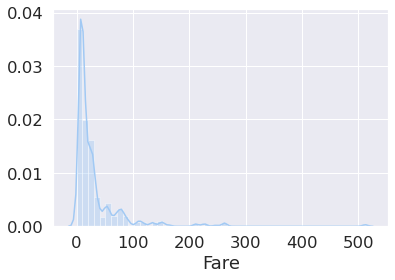

In [290]:
sns.distplot(train['Fare'])

## Let's see the correlation among different columns now

#### But before that, let's map the test values in sex to numerical datatypes, and convert the Pclass into different columns. Let's also combine sibsp and parch into another column 'family'

In [309]:
train['Sex'] = train['Sex'].map({'female':1, 'male':0})
train['Firstclass']=train['Pclass'].apply(lambda x: 1 if x==1 else 0)
train['Secondclass'] = train['Pclass'].apply(lambda x: 1 if x == 2 else 0)
train['Thirdclass']=train['Pclass'].apply(lambda x: 1 if x==3 else 0)
train['Family']= train['SibSp']+train['Parch']+1
train['S'] = train['Embarked'].apply(lambda x: 1 if x=='S' else 0)
train['C'] = train['Embarked'].apply(lambda x: 1 if x== 'C' else 0)
train['Q'] = train['Embarked'].apply(lambda x: 1 if x== 'Q' else 0)

#do the same for test data
test['Sex'] = test['Sex'].map({'female':1, 'male':0})
test['Firstclass']=test['Pclass'].apply(lambda x: 1 if x==1 else 0)
test['Secondclass'] = test['Pclass'].apply(lambda x: 1 if x == 2 else 0)
test['Thirdclass']=test['Pclass'].apply(lambda x: 1 if x==3 else 0)
test['Family']= test['SibSp']+test['Parch']+1
test['S'] = test['Embarked'].apply(lambda x: 1 if x=='S' else 0)
test['C'] = test['Embarked'].apply(lambda x: 1 if x== 'C' else 0)
test['Q'] = test['Embarked'].apply(lambda x: 1 if x== 'Q' else 0)


train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Firstclass,Secondclass,Thirdclass,Family,S,C,Q
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,A5,7.2500,Z,S,Mr,0,0,1,2,1,0,0
2,1,1,1,38.0,1,0,PC,71.2833,C,C,Mrs,1,0,0,2,0,1,0
3,1,3,1,26.0,0,0,STONO2,7.9250,Z,S,Mrs,0,0,1,1,1,0,0
4,1,1,1,35.0,1,0,Z,53.1000,C,S,Mrs,1,0,0,2,1,0,0
5,0,3,0,35.0,0,0,Z,8.0500,Z,S,Mr,0,0,1,1,1,0,0


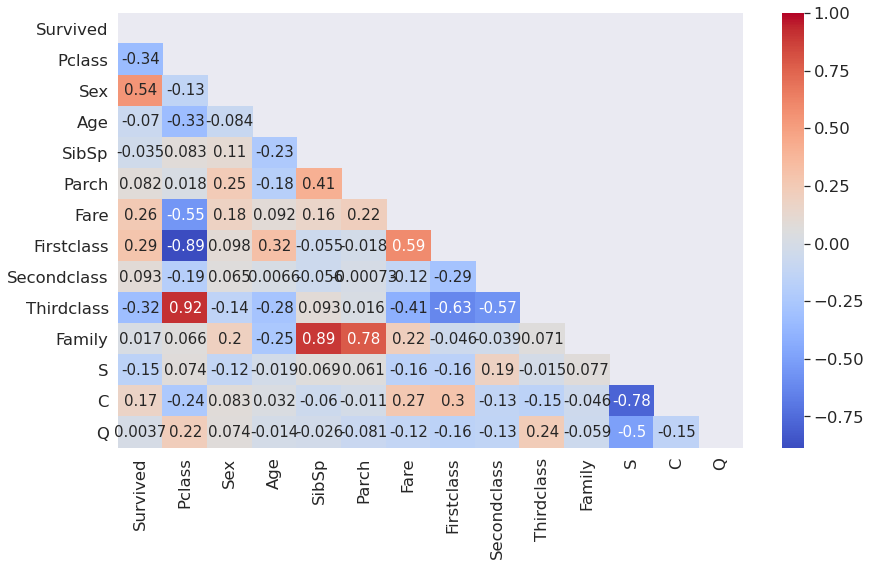

In [310]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5)
sns.heatmap(train.corr(), mask= np.triu(np.ones_like(train.corr(), dtype=np.bool)), cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

 So there seems to be a positive correlation between sex, fare, firstclass and survived, and a negative correlation between age, sibps, pclass and thirdclass.
fRom the negative correlation between fare and pclass, we can assume that first class people gave more fare than the other classes. so we can omit the fare collumn.
The columns to consider could probably be sex, firstclass, secondclass, thirdclass, age, S, C, Q and Sibsp(that has a negative correlation which can be considered)

# let's apply Logistic Regression model

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [306]:
features = ['Sex', 'Fare', 'Pclass', 'Age', 'SibSp', 'Parch', 'Embarked', 'Title']
x_train = pd.get_dummies(train[features])
x_test = pd.get_dummies(test[features])
y_train = train['Survived'] 

In [307]:
lr = LogisticRegression()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)

In [308]:
print(lr.score(x_train, y_train))

0.8316498316498316


In [303]:
print(prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [313]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title', 'Firstclass', 'Secondclass', 'Thirdclass',
       'Family', 'S', 'C', 'Q'],
      dtype='object')

In [315]:
#Code required to submit for competition
output = pd.DataFrame({'PassengerId': pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId'], 'Survived': prediction})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [316]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Thanks for reading my notebook. feedback will be appreciated. please upvote!